# Tugas Pendahuluan
Tugas Pendahuluan dikerjakan dengan dataset titanic yang dapat didownload pada link [berikut](https://drive.google.com/file/d/16j_9FEHLjh_Y_3CdUtp9M13VwImyT89T/view?usp=sharing). Lakukan prediksi apakah suatu penumpang selamat atau tidak (kolom **survived**), bernilai 0 jika tidak selamat, dan 1 jika selamat.

<br>
Tugas dikerjakan secara berkelompok, dengan 1 kelompok terdiri atas 2 mahasiswa. Waktu pengerjaan dari 28 Maret 2022 - 3 April 2022 pukul 23.59.

# 0. Loading Data and Library

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv("titanic_dataset.csv")
df

,index,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3.0,1.0,"Abelseth, Miss. Karen Marie",female,16.0,0.0,0.0,348125,7.6500,NaN,S
1,1,3.0,0.0,"Burns, Miss. Mary Delia",female,18.0,0.0,0.0,330963,7.8792,NaN,Q
2,2,1.0,1.0,"Fortune, Miss. Alice Elizabeth",female,24.0,3.0,2.0,19950,263.0000,C23 C25 C27,S
3,3,3.0,1.0,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1.0,0.0,345572,17.4000,NaN,S
4,4,3.0,0.0,"Jonsson, Mr. Nils Hilding",male,27.0,0.0,0.0,350408,7.8542,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1304,3.0,1.0,"Dahl, Mr. Karl Edwart",male,45.0,0.0,0.0,7598,8.0500,NaN,S
1305,1305,1.0,0.0,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1.0,0.0,PC 17758,108.9000,C65,C
1306,1306,2.0,1.0,"Becker, Miss. Ruth Elizabeth",female,12.0,2.0,1.0,230136,39.0000,F4,S
1307,1307,3.0,1.0,"Murphy, Miss. Katherine ""Kate""",female,NaN,1.0,0.0,367230,15.5000,NaN,Q


# I. Data Understanding
Tujuan dari bagian ini adalah peserta dapat memahami kualitas dari data yang diberikan. Hal ini meliputi:
1. Ukuran data
2. Statistik dari tiap fitur
3. Pencilan (outlier)
4. Korelasi
5. Distribusi 

## I.1 
Carilah:
1. Ukuran dari data (instances dan features)
2. Tipe dari tiap-tiap fitur 
3. Banyaknya unique values dari fitur yang bertipe kategorikal
4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur yang tidak bertipe kategorikal

In [34]:
instance = len(df)
features = len(df.columns)
feature_type = df.dtypes
df_categ = df[['name', 'sex', 'ticket', 'cabin', 'embarked']].copy()
df_noncateg = df[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']].copy()
# uniqueValues = (df['name'].append(df['sex']).append(df['ticket']).append(df['cabin']).append(df['embarked'])).nunique()
uniqueValues2 = df_categ.nunique()
mini = df_noncateg.min()
maks = df_noncateg.max()
rata_rata = df_noncateg.mean()
med = df_noncateg.median()
std_dev = df_noncateg.std()

print("1. Ukuran dari data: instances = " + str(instance) + " , feature = " + str(features))
print()
print("2. Tipe dari tiap-tiap fitur: ")
print(feature_type)
print()
print("3. Banyaknya unique values dari fitur yang bertipe kategorikal: ")
# print(uniqueValues)
print(uniqueValues2)

1. Ukuran dari data: instances = 1309 , feature = 12

2. Tipe dari tiap-tiap fitur: 
index         int64
pclass      float64
survived    float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

3. Banyaknya unique values dari fitur yang bertipe kategorikal: 
name        1307
sex            2
ticket       929
cabin        186
embarked       3
dtype: int64


In [35]:
print("4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur yang tidak bertipe kategorikal: ")
print()
print("Nilai Minimum: ")
print(mini)
print()
print("Nilai Maksimum: ")
print(maks)
print()
print("Nilai Rata-Rata: ")
print(rata_rata)

4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur yang tidak bertipe kategorikal: 

Nilai Minimum: 
pclass      1.0000
survived    0.0000
age         0.1667
sibsp       0.0000
parch       0.0000
fare        0.0000
dtype: float64

Nilai Maksimum: 
pclass        3.0000
survived      1.0000
age          80.0000
sibsp         8.0000
parch         9.0000
fare        512.3292
dtype: float64

Nilai Rata-Rata: 
pclass       2.294882
survived     0.381971
age         29.881135
sibsp        0.498854
parch        0.385027
fare        33.295479
dtype: float64


In [36]:
print("Nilai Median: ")
print(med)
print()
print("Nilai Standar Deviasi: ")
print(std_dev)

Nilai Median: 
pclass       3.0000
survived     0.0000
age         28.0000
sibsp        0.0000
parch        0.0000
fare        14.4542
dtype: float64

Nilai Standar Deviasi: 
pclass       0.837836
survived     0.486055
age         14.413500
sibsp        1.041658
parch        0.865560
fare        51.758668
dtype: float64


## I.2
Carilah:
1. Missing values dari tiap fitur
2. Outliers dari tiap fitur (gunakan metode yang kalian ketahui)

In [52]:
miss_val = df.isnull().sum()
print("1. Missing values dari tiap fitur: ")
print(miss_val)

1. Missing values dari tiap fitur: 
index          0
pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64


In [65]:
def outlier(column):
    Q1 = np.percentile(df[column], 25,
                    interpolation = 'midpoint')
    
    Q3 = np.percentile(df[column], 75,
                   interpolation = 'midpoint')

    IQR = Q3 - Q1

    upper = df[column] >= (Q3+1.5*IQR)
    count_upper = len(np.where(upper)[0])

    lower = df[column] <= (Q1-1.5*IQR)
    count_lower = len(np.where(lower)[0])

    count_outlier = count_upper + count_lower
    return(count_outlier)
    # print(np.where(upper))
    # print(np.where(lower))

print("2. Outliers dari tiap fitur: ")

for col in df_noncateg.columns:
    print(col + ": " + str(outlier(col)))
    # print(col + ": ")
    # outlier(col)
# outlier('pclass')

2. Outliers dari tiap fitur: 
pclass: 0
survived: 0
age: 0
sibsp: 57
parch: 2311
fare: 0


## I.3
Carilah:
1. Korelasi antar fitur
2. Visualisasikan distribusi dari tiap fitur (kategorikal dan kontinu)
3. Visualisasikan distribusi dari tiap fitur, dengan data dibagi tiap unique values fitur survived

In [71]:
print("1. Korelasi antar fitur: ")
print(df.corr())

1. Korelasi antar fitur: 
             index    pclass  survived       age     sibsp     parch      fare
index     1.000000 -0.003466  0.002967 -0.003376 -0.015501 -0.013538 -0.022424
pclass   -0.003466  1.000000 -0.312469 -0.408106  0.060832  0.018322 -0.558629
survived  0.002967 -0.312469  1.000000 -0.055513 -0.027825  0.082660  0.244265
age      -0.003376 -0.408106 -0.055513  1.000000 -0.243699 -0.150917  0.178739
sibsp    -0.015501  0.060832 -0.027825 -0.243699  1.000000  0.373587  0.160238
parch    -0.013538  0.018322  0.082660 -0.150917  0.373587  1.000000  0.221539
fare     -0.022424 -0.558629  0.244265  0.178739  0.160238  0.221539  1.000000


2. Visualisasi distribusi dari tiap fitur (kategorikal dan kontinu): 
3. Visualisasi distribusi dari tiap fitur, dengan data dibagi tiap unique values fitur survived


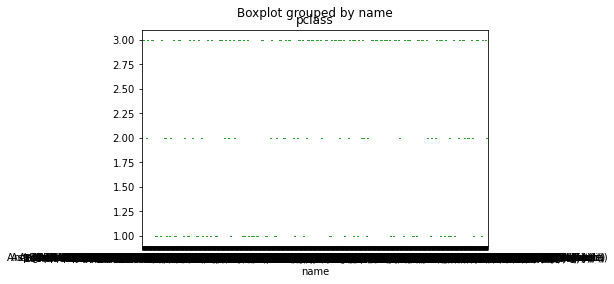

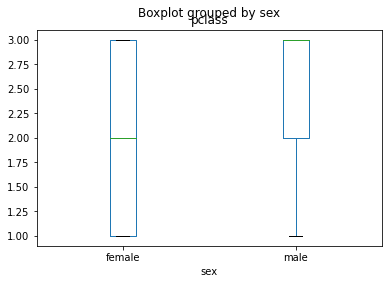

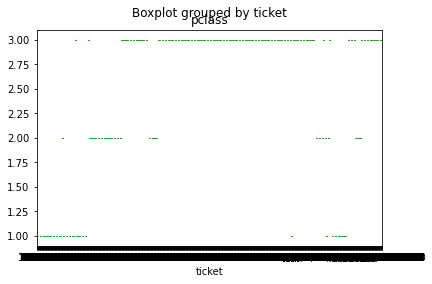

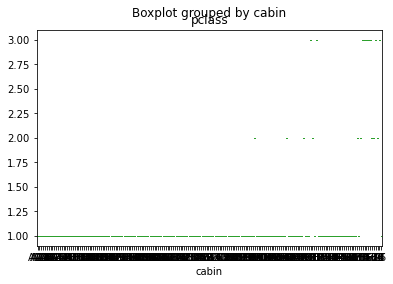

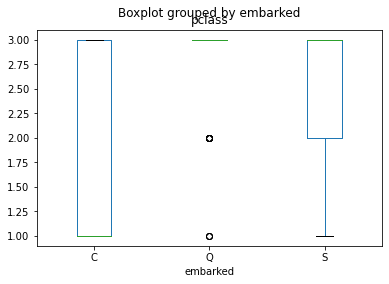

In [74]:
print("2. Visualisasi distribusi dari tiap fitur (kategorikal dan kontinu): ")
# print(df.describe(include = "all"))
# for cat in df_categ:
#     df.boxplot(by =cat, column =['pclass'], grid = False)
print("3. Visualisasi distribusi dari tiap fitur, dengan data dibagi tiap unique values fitur survived")

## I.4
Lakukanlah analisa pada data lebih lanjut jika dibutuhkan, kemudian lakukanlah:
1. Penambahan fitur jika memungkinkan
2. Pembuangan fitur yang menurut kalian tidak dibutuhkan
3. Penanganan missing values
4. Transformasi data kategorikal menjadi numerikal (encoding), dengan metode yang kalian inginkan
5. Lakukan scaling dengan MinMaxScaler

In [ ]:
# I.4 Put your code here

# II. Experiments Design
Tujuan dari bagian ini adalah peserta dapat memahami cara melakukan eksperimen mencari metode terbaik dengan benar. Hal ini meliputi:
1. Pembuatan model
2. Proses validasi
3. Hyperparameter tuning

## II.1
Tentukanlah metrics yang akan digunakan pada eksperimen kali ini (dapat lebih dari 1 metric)

Put your answer for section II.1 here

## II.2 
Bagi data dengan perbandingan 0.8 untuk data train dan 0.2 untuk data validasi

In [ ]:
# II.2 Put your code here

## II.3
Lakukanlah:
1. Prediksi dengan menggunakan model Logistic Regression sebagai *baseline*
2. Tampilkan evaluasi dari model yang dibangun dari metrics yang anda tentukan pada II.1
3. Tampilkan confusion matrix

In [ ]:
# II.3 Put your code here

## II.4 
Lakukanlah:
1. Pembelajaran dengan model lain
2. Hyperparameter tuning model yang kalian pakai dengan menggunakan Grid Search (perhatikan random factor pada beberapa algoritma model)
3. Lakukan validasi dengan menggunakan cross validation


In [ ]:
# II.4 Put your code here

# III. Improvement
Terdapat beberapa metode untuk melakukan peningkatan performa, contohnya adalah:
1. Melakukan oversampling / undersampling pada data
2. Menggabungkan beberapa model 

Pada bagian ini, kalian diharapkan dapat:
1. Melakukan training dengan data hasil oversampling / undersampling dan melakukan validasi dengan benar
2. Memahami beberapa metode untuk menggabungkan beberapa model

## III.1
Lakukanlah:
1. Oversampling pada kelas minoritas pada data train, kemudian train dengan model *baseline* (II.3), lakukan validasi dengan data validasi. Data train dan validasi adalah data yang kalian bagi pada bagian II.2
2. Undersampling pada kelas mayoritas pada data train, kemudian train dengan model *baseline* (II.3) lakukan validasi dengan data validasi. Data train dan validasi adalah data yang kalian bagi pada bagian II.2

In [ ]:
# III.1 Put your code here

## III.2
Lakukanlah:
1. Eksplorasi soft voting, hard voting, dan stacking
2. Buatlah model Logistic Regression dan SVM (boleh menggunakan model dengan beberapa parameter yang berbeda)
3. Lakukanlah soft voting dari model-model yang sudah kalian buat pada poin 2
4. Lakukan hard voting dari model-model yang sudah kalian buat pada poin 2
5. Lakukanlah stacking dengan final classifier adalah Logistic Regression dari model-model yang sudah kalian buat pada poin 2
6. Lakukan validasi dengan metrics yang kalian tentukan untuk poin 3, 4, dan 5

Put your answer for section III.2 point 1 here

In [ ]:
# III.2 Put your code here

# IV. Analisis
Bandingkan hasil dari:
1. Model Baseline (II.3)
2. Model lain (II.4)
3. Hasil undersampling
4. Hasil oversampling
5. Hasil soft voting
6. Hasil hard voting
7. Hasil stacking 

Put your answer for section IV here